In [977]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import os
import cv2
import pandas as pd
import argparse
import shutil
import seaborn as sns
import json
import h5py
import glob
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve

### Import scores 

In [978]:
root = "/home/mathiane/LNENWork/data_RoFormerMIL_CaA1CaA2_norm/dataRoFormer/results/task_4_carcinoids_CaA1_CaA2/CaA1Ca2_unbalanced_norm/label_frac=100/BTRoPEAMIL_s_pixel/training/2024-04-02_17-10-19"

In [979]:
list_res_test

['/home/mathiane/LNENWork/data_RoFormerMIL_CaA1CaA2_norm/dataRoFormer/results/task_4_carcinoids_CaA1_CaA2/CaA1Ca2_unbalanced_norm/label_frac=100/BTRoPEAMIL_s_pixel/training/2024-04-02_17-10-19/patients_preds.parquet/3/fold=3/split=test/92584f34c5744adcb5d322b7c3a41897-0.parquet',
 '/home/mathiane/LNENWork/data_RoFormerMIL_CaA1CaA2_norm/dataRoFormer/results/task_4_carcinoids_CaA1_CaA2/CaA1Ca2_unbalanced_norm/label_frac=100/BTRoPEAMIL_s_pixel/training/2024-04-02_17-10-19/patients_preds.parquet/3/fold=3/split=test/f884afb58c744d31807646fdb787ae5d-0.parquet',
 '/home/mathiane/LNENWork/data_RoFormerMIL_CaA1CaA2_norm/dataRoFormer/results/task_4_carcinoids_CaA1_CaA2/CaA1Ca2_unbalanced_norm/label_frac=100/BTRoPEAMIL_s_pixel/training/2024-04-02_17-10-19/patients_preds.parquet/3/fold=3/split=test/a1a1374119e84e5aa87790ed3ff7ed5c-0.parquet',
 '/home/mathiane/LNENWork/data_RoFormerMIL_CaA1CaA2_norm/dataRoFormer/results/task_4_carcinoids_CaA1_CaA2/CaA1Ca2_unbalanced_norm/label_frac=100/BTRoPEAMIL_s

In [980]:
list_res_test = glob.glob(f"{root}/patients_preds.parquet/*/*/*/*.parquet")
c = 0 
for path_res in list_res_test:
    df_res_c = pd.read_parquet(path_res)
    df_res_c["A1"] = df_res_c["probas"].values[0][0]
    df_res_c["A2"] = df_res_c["probas"].values[0][1]
    if c == 0:
        df_res = df_res_c     
    else:
        df_res = pd.concat([df_res, df_res_c])
    c +=1
df_res.head()

,slide_id,preds,labels,probas,A1,A2
0,TNE0229,1,1,"[0.24598954617977142, 0.7540104985237122]",0.245990,0.754010
0,TNE0072,0,0,"[0.9713200926780701, 0.0286798607558012]",0.971320,0.028680
0,TNE1008,1,1,"[0.009394396096467972, 0.9906056523323059]",0.009394,0.990606
0,TNE0985,0,0,"[0.7433310747146606, 0.25666892528533936]",0.743331,0.256669
0,TNE0898,1,1,"[0.038610927760601044, 0.9613890647888184]",0.038611,0.961389


In [981]:
df_res.shape

(28, 6)

In [982]:
print(roc_auc_score(df_res['labels'], df_res['A2']))

1.0


In [983]:
df_res

,slide_id,preds,labels,probas,A1,A2
0,TNE0229,1,1,"[0.24598954617977142, 0.7540104985237122]",0.245990,0.754010
0,TNE0072,0,0,"[0.9713200926780701, 0.0286798607558012]",0.971320,0.028680
0,TNE1008,1,1,"[0.009394396096467972, 0.9906056523323059]",0.009394,0.990606
0,TNE0985,0,0,"[0.7433310747146606, 0.25666892528533936]",0.743331,0.256669
0,TNE0898,1,1,"[0.038610927760601044, 0.9613890647888184]",0.038611,0.961389
0,TNE0797,0,0,"[0.6342282891273499, 0.36577165126800537]",0.634228,0.365772
0,TNE1001,0,0,"[0.9846494793891907, 0.015350574627518654]",0.984649,0.015351
0,TNE1794,0,0,"[0.9105851054191589, 0.08941483497619629]",0.910585,0.089415
0,TNE0228,1,1,"[0.004323086701333523, 0.9956769347190857]",0.004323,0.995677
0,TNE0881,1,1,"[0.30663084983825684, 0.6933691501617432]",0.306631,0.693369


## Create one heatmap

### Import attention scores

In [1097]:
sample= "TNE0080"

In [1098]:
if df_res[df_res["slide_id"] == sample]["labels"].values[0] == 1:
     arch = "CaA2"
     dim_avg = 1
else:
    arch = "CaA1"
    dim_avg = 0

In [1099]:
attn_scores = h5py.File(glob.glob(f"{root}/attention_scores/*/{sample}.h5")[0], 'r')

In [1100]:
glob.glob(f"{root}/attention_scores/*/{sample}.h5")[0]

'/home/mathiane/LNENWork/data_RoFormerMIL_CaA1CaA2_norm/dataRoFormer/results/task_4_carcinoids_CaA1_CaA2/CaA1Ca2_unbalanced_norm/label_frac=100/BTRoPEAMIL_s_pixel/training/2024-04-02_17-10-19/attention_scores/1/TNE0080.h5'

In [1101]:
attn_scores_coords = attn_scores.get("coords").value


/home/mathiane/miniconda3/envs/HaloAE/lib/python3.6/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


In [1102]:
attn_scores = attn_scores.get("attention_scores").value*10000

/home/mathiane/miniconda3/envs/HaloAE/lib/python3.6/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


In [1103]:
attn_scores[0,:,:].shape

(8, 15953)

In [1104]:
attn_scores[dim_avg,[0,1,2,3,4,5,7],:].transpose().mean(axis=1)

array([0.5864301 , 0.5783876 , 0.56379807, ..., 0.56423825, 0.66651785,
       0.57936275], dtype=float32)

In [1105]:
if arch == "CaA1" :
    attn_scores_avg = attn_scores[dim_avg,6,:].transpose()#.mean(axis=1)#.shape
else:
    attn_scores_avg =  attn_scores[dim_avg,[0,1,2,3,4,5,7],:].transpose().mean(axis=1)

In [1106]:
attn_scores_ori = attn_scores#/10000

In [1107]:
attn_scores_ori.shape

(2, 8, 15953)

In [1108]:
Attn_scores_df_a1_a2 = pd.DataFrame({
             "attn_scores_avg_a1_0": attn_scores_ori[0,0,:].transpose(),
            "attn_scores_avg_a2_0": attn_scores_ori[1,0,:].transpose(),
            "attn_scores_avg_a1_1": attn_scores_ori[0,1,:].transpose(),
            "attn_scores_avg_a2_1": attn_scores_ori[1,1,:].transpose(),
            "attn_scores_avg_a1_2": attn_scores_ori[0,2,:].transpose(),
            "attn_scores_avg_a2_2": attn_scores_ori[1,2,:].transpose(),
            "attn_scores_avg_a1_3": attn_scores_ori[0,3,:].transpose(),
            "attn_scores_avg_a2_3": attn_scores_ori[1,3,:].transpose(),
            "attn_scores_avg_a1_4": attn_scores_ori[0,4,:].transpose(),
            "attn_scores_avg_a2_4": attn_scores_ori[1,4,:].transpose(),
            "attn_scores_avg_a1_5": attn_scores_ori[0,5,:].transpose(),
            "attn_scores_avg_a2_5": attn_scores_ori[1,5,:].transpose(),#
            "attn_scores_avg_a1_6": attn_scores_ori[0,6,:].transpose(),
            "attn_scores_avg_a2_6": attn_scores_ori[1,6,:].transpose(),
             "attn_scores_avg_a1_7": attn_scores_ori[0,7,:].transpose(),
            "attn_scores_avg_a2_7": attn_scores_ori[1,7,:].transpose()
            })
           

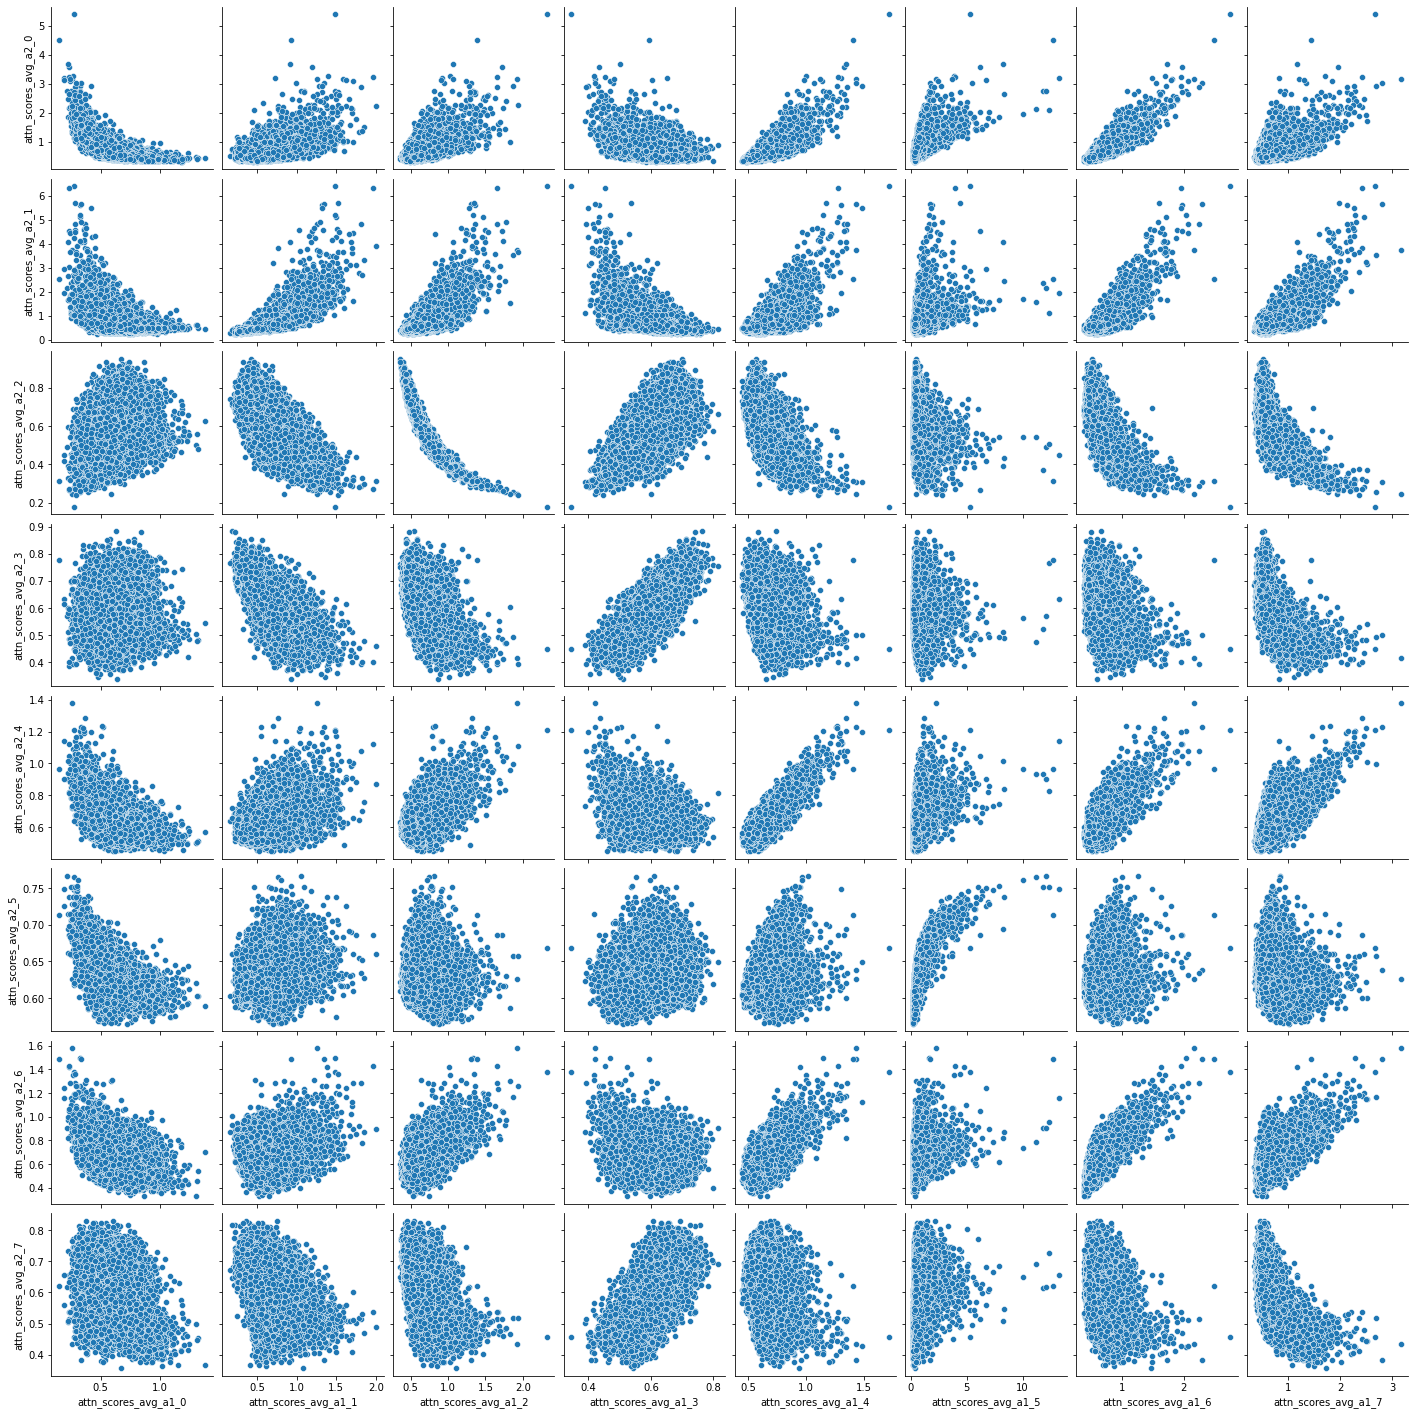

In [1109]:
attn__paiplot = sns.pairplot(Attn_scores_df_a1_a2,
              x_vars=["attn_scores_avg_a1_0", "attn_scores_avg_a1_1", "attn_scores_avg_a1_2", "attn_scores_avg_a1_3", "attn_scores_avg_a1_4", "attn_scores_avg_a1_5", "attn_scores_avg_a1_6",  "attn_scores_avg_a1_7"],
              y_vars=["attn_scores_avg_a2_0", "attn_scores_avg_a2_1", "attn_scores_avg_a2_2", "attn_scores_avg_a2_3", "attn_scores_avg_a2_4", "attn_scores_avg_a2_5",  "attn_scores_avg_a2_6", "attn_scores_avg_a2_7"],
)    

In [1034]:
attn_scores_a1_avg = attn_scores[0,1,:].transpose()#.mean(axis=1)#.shape
attn_scores_a2_avg = attn_scores[1,1,:].transpose()#.mean(axis=1)#.shape
Attn_scores_df_a1_a2 = pd.DataFrame({"x_rank":attn_scores_coords[:,0],
             "y_rank":attn_scores_coords[:,1], 
             "attn_scores_avg_a1": attn_scores_a1_avg,
            "attn_scores_avg_a2": attn_scores_a2_avg,
            "label": np.repeat(arch, attn_scores_coords[:,0].shape[0])})

In [1035]:
Attn_scores_df_a1_a2.sort_values(["attn_scores_avg_a1"], ascending = True).iloc[:20,]

,x_rank,y_rank,attn_scores_avg_a1,attn_scores_avg_a2,label
9888,9831,6945,0.154765,0.267282,CaA2
12411,12387,5039,0.181469,0.403251,CaA2
7545,7489,11459,0.184327,0.338537,CaA2
540,508,10888,0.201457,0.428369,CaA2
9372,9304,10146,0.211538,0.279426,CaA2
5014,4970,8672,0.212989,0.265332,CaA2
3824,3806,6675,0.213406,0.225074,CaA2
10120,10048,9987,0.218253,0.315937,CaA2
9666,9616,6675,0.218894,0.325727,CaA2
8533,8465,10888,0.221042,0.283965,CaA2


In [1036]:
Attn_scores_df_a1_a2.sort_values(["attn_scores_avg_a2"], ascending = True).iloc[:20,]

,x_rank,y_rank,attn_scores_avg_a1,attn_scores_avg_a2,label
3824,3806,6675,0.213406,0.225074,CaA2
5531,5501,7852,0.222558,0.230412,CaA2
4021,3995,6675,0.300950,0.244435,CaA2
7620,7581,8022,0.235528,0.255541,CaA2
5034,4970,12244,0.230072,0.257294,CaA2
9090,8990,14924,0.267148,0.258553,CaA2
4523,4418,15714,0.300950,0.260454,CaA2
7433,7396,7688,0.312939,0.260709,CaA2
8290,8267,4236,0.346223,0.260709,CaA2
1157,1112,11592,0.334589,0.264168,CaA2


<AxesSubplot:xlabel='attn_scores_avg_a1', ylabel='attn_scores_avg_a2'>

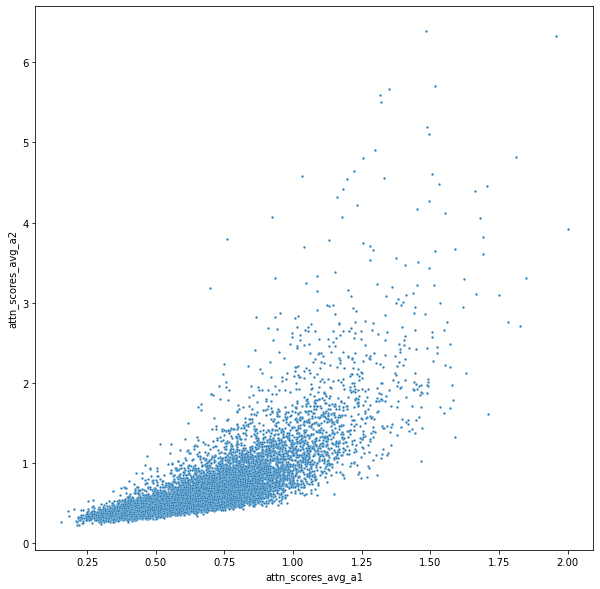

In [1037]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
sns.scatterplot(data=Attn_scores_df_a1_a2, x="attn_scores_avg_a1", y="attn_scores_avg_a2", s = 6)


<AxesSubplot:xlabel='attn_scores_avg_a1', ylabel='attn_scores_avg_a2'>

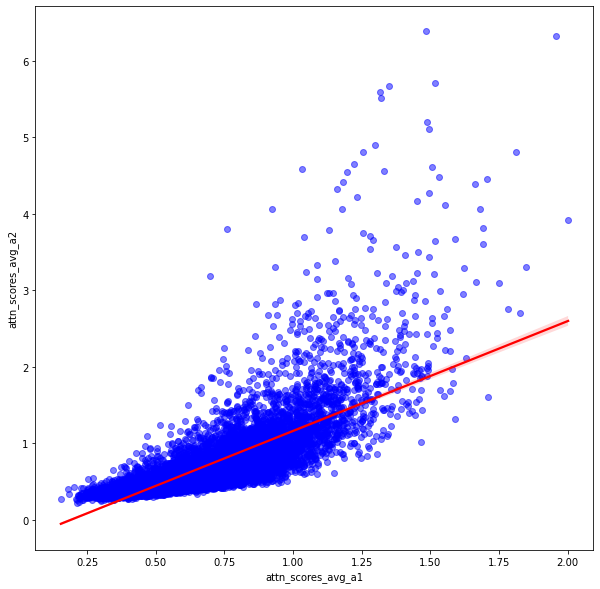

In [1038]:
sns.regplot(data=Attn_scores_df_a1_a2, x="attn_scores_avg_a1", y="attn_scores_avg_a2",    scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"})

In [1039]:
Attn_scores_df = pd.DataFrame({"x_rank":attn_scores_coords[:,0],
             "y_rank":attn_scores_coords[:,1], 
             "attn_scores_avg": attn_scores_avg,
            "label": np.repeat(arch, attn_scores_coords[:,0].shape[0])})

In [999]:
Attn_scores=Attn_scores_df

In [1000]:
Attn_scores.head()

,x_rank,y_rank,attn_scores_avg,label
0,0,1579,0.586430,CaA2
1,1,1436,0.578388,CaA2
2,2,1477,0.563798,CaA2
3,2,2026,0.566393,CaA2
4,4,1532,0.597304,CaA2


In [1001]:
Attn_scores[Attn_scores["label"] == arch].shape

(15953, 4)

### Get coords table

In [1002]:
Coords_root_folder = "/home/mathiane/LNENWork/data_RoFormerMIL_CaA1CaA2_norm/coords_table"

In [1003]:
Coords_path = os.path.join(Coords_root_folder, arch, f"{sample}coords.csv")
Coords_ = pd.read_csv(Coords_path)
Coords_["label"] = np.repeat(arch, Coords_.shape[0])


In [1004]:
Coords = Coords_

In [1005]:
Attn_scores = pd.merge(Coords, Attn_scores,  how='left', left_on=['label','x_rank', 'y_rank'], right_on = ['label','x_rank', 'y_rank'])

In [1006]:
Attn_scores.head()

,img_id_c,x,y,x_rank,y_rank,label,attn_scores_avg
0,TNE0080_4609_20353,4609,20353,0,1579,CaA2,0.586430
1,TNE0080_4993_19201,4993,19201,1,1436,CaA2,0.578388
2,TNE0080_5377_19585,5377,19585,2,1477,CaA2,0.563798
3,TNE0080_5377_24577,5377,24577,2,2026,CaA2,0.566393
4,TNE0080_5761_19969,5761,19969,4,1532,CaA2,0.597304


### Load parameters for tiles

In [1007]:
args = dict()
args['sample'] = sample
args['folder_tumoral_tiles'] ='/home/mathiane/LNENWork/Tiles_HE_all_samples_384_384_Vahadane_2'
args['folder_WSI_jpg'] =  '/home/mathiane/LNENWork/FullSlidesToJpeg'


In [1008]:
Q1 = Attn_scores["attn_scores_avg"].quantile(0.01)
Q9 = Attn_scores["attn_scores_avg"].quantile(0.99)

# Split DataSet by sample's name

In [1009]:
path_main_TNE = args["folder_tumoral_tiles"]
for f in os.listdir(path_main_TNE):
    if f.find(args['sample']) != -1:
        folder_name = f
        break
folder_name

'TNE0080'

In [1010]:
outputdir = f'{root}/HeatMaps'

In [1011]:
os.makedirs(f'{outputdir}/{arch}',exist_ok=True)

In [1012]:
sample

'TNE0080'

In [1013]:
sample_maxX_maxY = {}
path_main_TNE = args["folder_tumoral_tiles"]#args.path_tne_tiles
sample = sample

sample_folder = os.path.join(path_main_TNE, folder_name)

xmax = 0
ymax = 0
for folder in os.listdir(sample_folder):
    tiles_p = os.path.join(path_main_TNE, folder_name, folder)
    for tiles_l in os.listdir(tiles_p):
        xmax_c = int(tiles_l.split('_')[1])
        ymax_c  = int(tiles_l.split('_')[2].split('.')[0])
        if xmax < xmax_c:
            xmax = xmax_c
        else:
            xmax = xmax
        if ymax < ymax_c:
            ymax = ymax_c
        else:
            ymax = ymax

sample_maxX_maxY[sample] = [xmax, ymax]
sample_maxX_maxY
    

{'TNE0080': [113665, 74497]}

In [1014]:
from scipy import stats

In [1015]:
im_size = 384

In [1016]:
full_LNEN_WSI = args['folder_WSI_jpg']
for f in  os.listdir(full_LNEN_WSI):

    if f.find(args['sample'][:7]) != -1:
        folder_name_full_size = f
        break

In [1017]:
folder_name_full_size

'TNE0080.jpg'

In [1018]:
Attn_scores["x"].max()

113665

In [1019]:
Attn_scores["y"].max()

74497

In [1020]:
for k in sample_maxX_maxY.keys():
    w =  tuple(sample_maxX_maxY[k])[0] + im_size
    h = tuple(sample_maxX_maxY[k])[1] + im_size        
    seq = im_size
    W = len(list(range(1, w, seq)))
    H = len(list(range(1, h, seq)))
    
    mat_prob_atypical =   np.empty((W*30, H*30))#-1
    mat_prob_atypical[:] =  np.NaN
    
    mat_prob_binary = np.empty((W*30, H*30))
    mat_prob_binary[:] =  np.NaN
        
df_test_pred_s = Attn_scores
        

In [1021]:
df_test_pred_s.head()

,img_id_c,x,y,x_rank,y_rank,label,attn_scores_avg
0,TNE0080_4609_20353,4609,20353,0,1579,CaA2,0.586430
1,TNE0080_4993_19201,4993,19201,1,1436,CaA2,0.578388
2,TNE0080_5377_19585,5377,19585,2,1477,CaA2,0.563798
3,TNE0080_5377_24577,5377,24577,2,2026,CaA2,0.566393
4,TNE0080_5761_19969,5761,19969,4,1532,CaA2,0.597304


In [1022]:
[args["sample"]]

['TNE0080']

In [1023]:
Path2Image = []
PredTumorNomal = []
loss_t = "Attention_scores"
for k in sample_maxX_maxY.keys():
    if k in [args["sample"]]:  
        os.makedirs(f"{outputdir}/{arch}/{k}", exist_ok=True)  
        for i in range(df_test_pred_s.shape[0]):
            x_ = int(df_test_pred_s.iloc[i,:]['x'])
            y_ = int(df_test_pred_s.iloc[i,:]['y'])
            
            Path2Image.append(df_test_pred_s.iloc[i,:]['img_id_c'])
            
            mat_prob_atypical[x_ // im_size * 30 :x_ // im_size *30 + 30 ,  y_ // im_size * 30 :y_ // im_size * 30 + 30 ]= df_test_pred_s.iloc[i,df_test_pred_s.columns.get_loc('attn_scores_avg')]
  
            
        if k.find('TNE') != -1:
            get_full_img = full_LNEN_WSI + "/" +folder_name_full_size
            print('get_full_img  ', get_full_img)

        im = cv2.imread(get_full_img)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        fig=plt.figure(1,figsize=(8,8))
        plt.imshow(im.astype('uint8'))

        print(outputdir, k+'_RoFormerMIL_','WSI_{}.png'.format(k))
        plt.title('WSI_{}'.format(k))
        fig.savefig(os.path.join(outputdir, arch, k,'WSI_{}.png'.format(k)), dpi=fig.dpi)
        plt.close()

        #tiles heat map sans normalisation
        
        color_map = plt.cm.get_cmap('coolwarm')
        fig=plt.figure(2,figsize=(8,8))
        plt.matshow(mat_prob_atypical,  cmap=color_map,
                    interpolation='none',  fignum=2, vmin=Q1, 
                    vmax =Q9)
        mtitle = 'Arch {} tiles scores sample {} '.format(arch ,k)
        plt.title(mtitle)
        plt.colorbar()
        fig.savefig(os.path.join(outputdir, arch,k, 'arch_{}_map_minmaxnorm_{}_{}.png'.format(arch, k, loss_t)), dpi=fig.dpi)
        plt.colorbar()
        plt.close()
                
       
        
        color_map = plt.cm.get_cmap('coolwarm')
        fig=plt.figure(4,figsize=(8,8))
        plt.matshow(mat_prob_atypical,  cmap=color_map,
                    interpolation='none',  fignum=4)
        mtitle = 'Arch {} tiles scores sample {} '.format(arch, k)
        plt.title(mtitle)
        plt.colorbar()
        fig.savefig(os.path.join(outputdir, arch,k,'Arch_{}_map_{}_{}.png'.format( arch, k, loss_t)), dpi=fig.dpi)
        plt.colorbar()
        plt.close()
    

get_full_img   /home/mathiane/LNENWork/FullSlidesToJpeg/TNE0080.jpg
/home/mathiane/LNENWork/data_RoFormerMIL_CaA1CaA2_norm/dataRoFormer/results/task_4_carcinoids_CaA1_CaA2/CaA1Ca2_unbalanced_norm/label_frac=100/BTRoPEAMIL_s_pixel/training/2024-04-02_17-10-19/HeatMaps TNE0080_RoFormerMIL_ WSI_TNE0080.png


In [1024]:
df_test_pred_s.head()

,img_id_c,x,y,x_rank,y_rank,label,attn_scores_avg
0,TNE0080_4609_20353,4609,20353,0,1579,CaA2,0.586430
1,TNE0080_4993_19201,4993,19201,1,1436,CaA2,0.578388
2,TNE0080_5377_19585,5377,19585,2,1477,CaA2,0.563798
3,TNE0080_5377_24577,5377,24577,2,2026,CaA2,0.566393
4,TNE0080_5761_19969,5761,19969,4,1532,CaA2,0.597304


In [1025]:
df_test_pred_s.sort_values(by=["attn_scores_avg"], ascending=False)

,img_id_c,x,y,x_rank,y_rank,label,attn_scores_avg
264,TNE0080_23809_26497,23809,26497,263,2311,CaA2,2.107477
14296,TNE0080_96385_27649,96385,27649,14293,2495,CaA2,1.796500
1306,TNE0080_37249_21121,37249,21121,1297,1672,CaA2,1.677507
9006,TNE0080_71425_22273,71425,22273,8990,1779,CaA2,1.645793
1438,TNE0080_38017_20737,38017,20737,1426,1629,CaA2,1.644878
...,...,...,...,...,...,...,...
4651,TNE0080_54913_23041,54913,23041,4644,1872,CaA2,0.495572
6458,TNE0080_61441_27265,61441,27265,6448,2429,CaA2,0.494978
8087,TNE0080_67969_26113,67969,26113,8067,2254,CaA2,0.491196
8793,TNE0080_70657_11905,70657,11905,8785,506,CaA2,0.488869


In [1026]:
some_tiles_id = list(df_test_pred_s.sort_values(by=["attn_scores_avg"], ascending=False)["img_id_c"].values[:20])

In [1027]:
os.makedirs(os.path.join(outputdir, arch , k ,  'DiscrimiantTiles'), exist_ok=True)
for tile  in some_tiles_id:
    t_path = os.path.join("/home/mathiane/LNENWork/Tiles_HE_all_samples_384_384_2", folder_name, "accept", folder_name  + "_" + tile[8:] + ".jpg")
    t_path
    shutil.copy(t_path , os.path.join(outputdir, arch , k ,  'DiscrimiantTiles'))

In [1028]:
attn__paiplot
fig = attn__paiplot.get_figure()
fig.savefig(os.path.join(outputdir, arch , k ,"attention_pait_plot.png")) 

'TNE0080TNE0080.jpg'